TASK-1 
PREDICTING THE PERCENTAGE OF A STUDENT BASED ON NO. OF HOURS STUDIED

IMPORTING THE LIBRARIES AND LOADING THE DATA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

print('Libraries imported successfully.')

Libraries imported successfully.


LOADING DATASET FROM ONLINE 

In [ ]:
url='http://bit.ly/w-data'
df = pd.read_csv(url)
print("Dataset imported successfully")

Dataset imported successfully


DATA ANALYSIS AND VISUALIZATION

In [ ]:
#head() is used to display the first few columns of our dataset 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.shape

(25, 2)

In [ ]:
#now check for any null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


VISUALIZATION THROUGH A SCATTER PLOT

Text(0, 0.5, 'Percentage Scored')

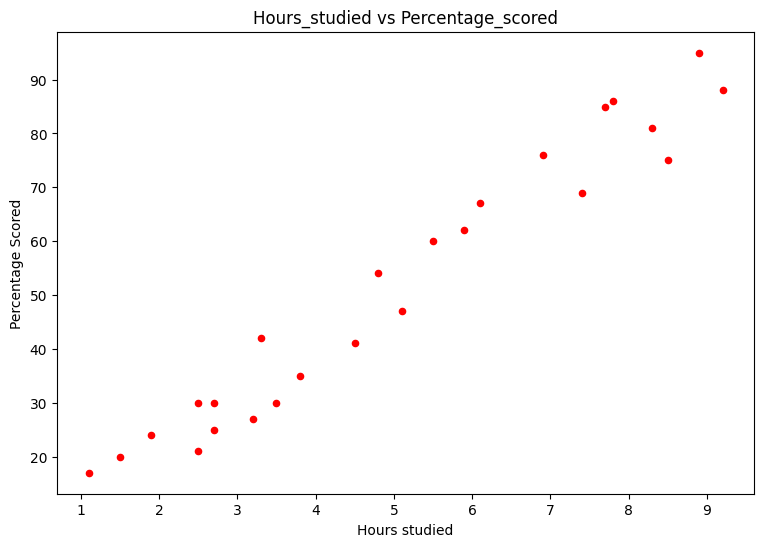

In [ ]:
df.plot(kind='scatter',x='Hours',y='Scores',figsize=(9,6),color='r')
plt.title("Hours_studied vs Percentage_scored")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scored")

WE CAN OBSERVE THAT THERE IS A POSITIVE LINEAR RELATION BETWEEN THE 'NUMBER OF HOURS STUDIED AND 'PERCENTAGE SCORED'

PREPARATION OF DATA

In [ ]:
x = df.iloc[:,:-1].values #independant variable
y = df.iloc[:,1].values   #dependant variable

TRAINING AND TEST OF DATA BY SPLITTING

In [ ]:
#our task is to train our model according to the years and salary by using training dataset
#then we test our model on test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=0)

NOW TRAINING THE ALGORITHM

In [ ]:
#splitting linear regression model into training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print("Training has been completed sucessfully")
print("cofficient :", regressor.coef_ )
print("intercepts:", regressor.intercept_ )

Training has been completed sucessfully
cofficient : [9.94167834]
intercepts: 1.9322042531516601


WE CAN FIT THE LINE OVER DATA IN LINEAR REGRESSION

Text(0, 0.5, 'Percentage Scored')

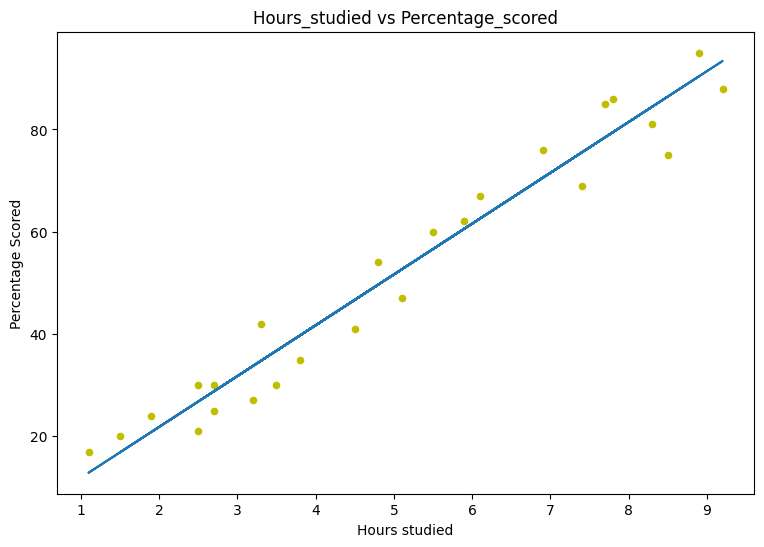

In [ ]:
line = regressor.coef_*x+regressor.intercept_

df.plot(kind='scatter',x='Hours',y='Scores',figsize=(9,6),color='y')
plt.plot(x, line)
plt.title("Hours_studied vs Percentage_scored")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scored")

BLUE LINE REPRESENTS THE BEST FIT LINE FOR THE DATA

NOW, PREDICTING THE DATASET RESULTS

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [ ]:
y_test    #y_test is the real scores of the test set
          #y_pred are predicted scores

array([20, 27, 69, 30, 62, 35, 24])

In [ ]:
df = pd.DataFrame({'actual':y_test, 'predicted': y_pred})
df

,actual,predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


EVALUATING THE MODEL AND CALCULATING THE ACCURACY OF THE MODEL USING MEAN ABSOLUTE ERROR 

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('r2_score :',r2_score(y_test,y_pred))

Mean Absolute Error: 4.130879918502482
r2_score : 0.9367661043365056


FINDING THE PREDICTED SCORE IF A STUDENT STUDIES 9.25 HOURS/DAY

In [ ]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours =  {}",format(own_pred[0]))
print("predicted Score= {}",format(own_pred[0]))





No of Hours =  {} 93.89272889341652
predicted Score= {} 93.89272889341652
